### A few initial libraries ###

In [1]:
import numpy as np
import qiskit
from qiskit import *
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute, transpile

from qiskit.transpiler import PassManager

from qiskit.converters import circuit_to_dag
from qiskit.visualization import dag_drawer, plot_histogram
from qiskit.compiler import assemble
from qiskit.tools.monitor import job_monitor

from qiskit import IBMQ
from qiskit.test.mock import FakeManhattan
from qiskit.test.mock import FakeBogota
from qiskit.test.mock import FakeMumbai
from qiskit.test.mock import FakeTokyo
# The pulse simulator
from qiskit.providers.aer import PulseSimulator

# Object for representing physical models
from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.pulse import PulseSystemModel
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview

import qiskit.providers.aer.noise as noise
from qiskit.providers.aer.noise import NoiseModel

from gate_variants.toffoli_variants import CCX_Variant_Gate 
from orientation_map import orientation_map_gen

from backends.backend_connectivity import cluster, couplingmap_to_graph, orientation_from_coupling

# Import from Qiskit Aer noise module
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import thermal_relaxation_error

from trios_bench.cnx_dirty import generate_dirty_multicontrol
from trios_bench.cnx_halfdirty import generate_cnx_halfdirty
from trios_bench.cnx_logdepth import generate_cnx_log_depth
from trios_bench.cnx_inplace import generate_cnx_inplace
from trios_bench.cuccaro_adder import generate_cuccaro_adder
from trios_bench.Takahashi_adder import generate_takahashi_adder
from trios_bench.incrementer_borrowedbit import generate_incrementer
from trios_bench.grovers_integer_search import generate_grover_integer_search_circuit
from trios_bench.qaoa import generate_random_QAOA

/Users/revilooliver/Documents/quantum_computing/anaconda/anaconda3/envs/qiskit-terra/lib/python3.7/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


In [2]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.18.3', 'qiskit-aer': '0.9.1', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.18.1', 'qiskit-aqua': '0.9.5', 'qiskit': '0.32.1', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [3]:
def cluster(k_inner, k_outer):
    coupling_map = []
    qid = 0
    for i in range(0, k_inner):
        for j in range(0, k_outer):
            qid = k_outer * i + j
            for j2 in range(0, k_outer):
                if j != j2:
                    coupling_map.append([qid, k_outer * i + j2])
                
        for i2 in range(0, k_inner):
            if i != i2:
                coupling_map.append([i*k_outer, i2*k_outer])

    return coupling_map

In [4]:
coupling_map = cluster(1, 20)

In [5]:
coupling_map

[[0, 1],
 [0, 2],
 [0, 3],
 [0, 4],
 [0, 5],
 [0, 6],
 [0, 7],
 [0, 8],
 [0, 9],
 [0, 10],
 [0, 11],
 [0, 12],
 [0, 13],
 [0, 14],
 [0, 15],
 [0, 16],
 [0, 17],
 [0, 18],
 [0, 19],
 [1, 0],
 [1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [1, 6],
 [1, 7],
 [1, 8],
 [1, 9],
 [1, 10],
 [1, 11],
 [1, 12],
 [1, 13],
 [1, 14],
 [1, 15],
 [1, 16],
 [1, 17],
 [1, 18],
 [1, 19],
 [2, 0],
 [2, 1],
 [2, 3],
 [2, 4],
 [2, 5],
 [2, 6],
 [2, 7],
 [2, 8],
 [2, 9],
 [2, 10],
 [2, 11],
 [2, 12],
 [2, 13],
 [2, 14],
 [2, 15],
 [2, 16],
 [2, 17],
 [2, 18],
 [2, 19],
 [3, 0],
 [3, 1],
 [3, 2],
 [3, 4],
 [3, 5],
 [3, 6],
 [3, 7],
 [3, 8],
 [3, 9],
 [3, 10],
 [3, 11],
 [3, 12],
 [3, 13],
 [3, 14],
 [3, 15],
 [3, 16],
 [3, 17],
 [3, 18],
 [3, 19],
 [4, 0],
 [4, 1],
 [4, 2],
 [4, 3],
 [4, 5],
 [4, 6],
 [4, 7],
 [4, 8],
 [4, 9],
 [4, 10],
 [4, 11],
 [4, 12],
 [4, 13],
 [4, 14],
 [4, 15],
 [4, 16],
 [4, 17],
 [4, 18],
 [4, 19],
 [5, 0],
 [5, 1],
 [5, 2],
 [5, 3],
 [5, 4],
 [5, 6],
 [5, 7],
 [5, 8],
 [5, 9],
 [5, 10],
 [5,

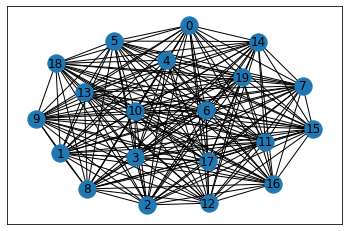

In [6]:
couplingmap_to_graph(coupling_map, Draw=True)

In [7]:
orientation_map = orientation_from_coupling(coupling_map)

In [8]:
orientation_map

{(0, 1): 'b',
 (0, 2): 'b',
 (0, 3): 'b',
 (0, 4): 'b',
 (0, 5): 'b',
 (0, 6): 'b',
 (0, 7): 'b',
 (0, 8): 'b',
 (0, 9): 'b',
 (0, 10): 'b',
 (0, 11): 'b',
 (0, 12): 'b',
 (0, 13): 'b',
 (0, 14): 'b',
 (0, 15): 'b',
 (0, 16): 'b',
 (0, 17): 'b',
 (0, 18): 'b',
 (0, 19): 'b',
 (1, 0): 'f',
 (1, 2): 'b',
 (1, 3): 'b',
 (1, 4): 'b',
 (1, 5): 'b',
 (1, 6): 'b',
 (1, 7): 'b',
 (1, 8): 'b',
 (1, 9): 'b',
 (1, 10): 'b',
 (1, 11): 'b',
 (1, 12): 'b',
 (1, 13): 'b',
 (1, 14): 'b',
 (1, 15): 'b',
 (1, 16): 'b',
 (1, 17): 'b',
 (1, 18): 'b',
 (1, 19): 'b',
 (2, 0): 'f',
 (2, 1): 'f',
 (2, 3): 'b',
 (2, 4): 'b',
 (2, 5): 'b',
 (2, 6): 'b',
 (2, 7): 'b',
 (2, 8): 'b',
 (2, 9): 'b',
 (2, 10): 'b',
 (2, 11): 'b',
 (2, 12): 'b',
 (2, 13): 'b',
 (2, 14): 'b',
 (2, 15): 'b',
 (2, 16): 'b',
 (2, 17): 'b',
 (2, 18): 'b',
 (2, 19): 'b',
 (3, 0): 'f',
 (3, 1): 'f',
 (3, 2): 'f',
 (3, 4): 'b',
 (3, 5): 'b',
 (3, 6): 'b',
 (3, 7): 'b',
 (3, 8): 'b',
 (3, 9): 'b',
 (3, 10): 'b',
 (3, 11): 'b',
 (3, 12): 'b',
 

### Load device and the device configuration object ###

In [9]:
IBMQ.load_account()

provider = IBMQ.get_provider('ibm-q-ornl')
# device = FakeMumbai()

# backend_prop = device.properties()

In [10]:
from qiskit_superstaq.superstaq_provider import SuperstaQProvider

In [11]:
superstaq_provider = SuperstaQProvider(api_key="ya29.A0ARrdaM-BWPjpkjhKgbVSRwWROaVE3g6mKCew2all4yXuPNLIwc6l65K10DiAMa-w8he0mR-i0Tb_jE6-GqqWlscj9Zq58rC2oSSzRVaLdZJMoy2bWqIXVhK3Tehp5N4zd8uHhyp01G9KC90Xmu3BKALiGiLP-w")

In [12]:
from level3_context import _parse_transpile_args, level_3_context_pass_manager
from level3_context_pulse import level_3_pass_manager, level_3_orign_pulse_pass_manager, level_3_context_pulse_pass_manager, level_3_pulse_pass_manager

In [14]:
qc0 = generate_dirty_multicontrol(6, 11)
qc1 = generate_cnx_halfdirty(19)
qc2 = generate_cnx_log_depth(19)
qc3 = generate_cnx_inplace(4)
qc4 = generate_cuccaro_adder(20)
qc5 = generate_takahashi_adder(20)
qc6 = generate_incrementer(5)
qc7 = generate_grover_integer_search_circuit(6, 3, 0, maxn=None, num_rounds=None)
qc8 = generate_random_QAOA(10, 0.6, 2)
qc_list = [qc0, qc1, qc2, qc3, qc4, qc5,qc6, qc7 , qc8]

In [15]:
backend = provider.get_backend('ibmq_montreal')

In [16]:
backend_monitor(backend)

ibmq_montreal
Configuration
-------------
    n_qubits: 27
    operational: True
    status_msg: active
    pending_jobs: 791
    backend_version: 1.11.13
    basis_gates: ['id', 'rz', 'sx', 'x', 'cx', 'reset']
    local: False
    simulator: False
    url: None
    supported_instructions: ['sx', 'u1', 'reset', 'setf', 'cx', 'x', 'play', 'u3', 'acquire', 'delay', 'shiftf', 'id', 'rz', 'measure', 'u2']
    u_channel_lo: [[{'q': 1, 'scale': (1+0j)}], [{'q': 0, 'scale': (1+0j)}], [{'q': 2, 'scale': (1+0j)}], [{'q': 4, 'scale': (1+0j)}], [{'q': 1, 'scale': (1+0j)}], [{'q': 3, 'scale': (1+0j)}], [{'q': 2, 'scale': (1+0j)}], [{'q': 5, 'scale': (1+0j)}], [{'q': 1, 'scale': (1+0j)}], [{'q': 7, 'scale': (1+0j)}], [{'q': 3, 'scale': (1+0j)}], [{'q': 8, 'scale': (1+0j)}], [{'q': 7, 'scale': (1+0j)}], [{'q': 4, 'scale': (1+0j)}], [{'q': 6, 'scale': (1+0j)}], [{'q': 10, 'scale': (1+0j)}], [{'q': 5, 'scale': (1+0j)}], [{'q': 9, 'scale': (1+0j)}], [{'q': 11, 'scale': (1+0j)}], [{'q': 8, 'scale': (1+0

Qubits [Name / Freq / T1 / T2 / RZ err / SX err / X err / Readout err]
----------------------------------------------------------------------
    Q0 / 4.91108 GHz / 150.41817 us / 135.20237 us / 0.00000 / 0.00023 / 0.00023 / 0.01330 
    Q1 / 4.83494 GHz / 158.91053 us / 41.31502 us / 0.00000 / 0.00015 / 0.00015 / 0.01380 
    Q2 / 4.98254 GHz / 101.82467 us / 70.81865 us / 0.00000 / 0.00042 / 0.00042 / 0.01850 
    Q3 / 5.10539 GHz / 87.74085 us / 32.36840 us / 0.00000 / 0.00032 / 0.00032 / 0.01330 
    Q4 / 5.00395 GHz / 173.58388 us / 205.57099 us / 0.00000 / 0.00029 / 0.00029 / 0.01700 
    Q5 / 5.03285 GHz / 110.39870 us / 66.17356 us / 0.00000 / 0.00041 / 0.00041 / 0.02180 
    Q6 / 4.95092 GHz / 170.78381 us / 31.51202 us / 0.00000 / 0.00039 / 0.00039 / 0.10900 
    Q7 / 4.90234 GHz / 113.69762 us / 125.79953 us / 0.00000 / 0.00030 / 0.00030 / 0.08530 
    Q8 / 4.90803 GHz / 64.09787 us / 95.65526 us / 0.00000 / 0.00026 / 0.00026 / 0.02500 
    Q9 / 5.04472 GHz / 81.47856 us / 9

In [17]:
backend_prop = backend.properties()

In [18]:
#orientation_map = orientation_map_gen(backend)

In [19]:
#coupling_map = [[0, 1], [1, 0], [1, 2], [1, 4], [2, 1], [2, 3], [3, 2], [3, 5], [4, 1], [4, 7], [5, 3], [5, 8], [6, 7], [7, 4], [7, 6], [7, 10], [8, 5], [8, 9], [8, 11], [9, 8], [10, 7], [10, 12], [11, 8], [11, 14], [12, 10], [12, 13], [12, 15], [13, 12], [13, 14], [14, 11], [14, 13], [14, 16], [15, 12], [15, 18], [16, 14], [16, 19], [17, 18], [18, 15], [18, 17], [18, 21], [19, 16], [19, 20], [19, 22], [20, 19], [21, 18], [21, 23], [22, 19], [22, 25], [23, 21], [23, 24], [24, 23], [24, 25], [25, 22], [25, 24], [25, 26], [26, 25]]

In [20]:
transpile_args = _parse_transpile_args(qc_list, backend = None, coupling_map = coupling_map, basis_gates = ['cx', 'rz', 'sx', 'x', 'acecr_pm'], seed_transpiler = 0, orientation_map = orientation_map)

In [21]:
pass_manager_config = transpile_args[0]['pass_manager_config']

In [22]:
print(pass_manager_config.orientation_map)

{(0, 1): 'b', (0, 2): 'b', (0, 3): 'b', (0, 4): 'b', (0, 5): 'b', (0, 6): 'b', (0, 7): 'b', (0, 8): 'b', (0, 9): 'b', (0, 10): 'b', (0, 11): 'b', (0, 12): 'b', (0, 13): 'b', (0, 14): 'b', (0, 15): 'b', (0, 16): 'b', (0, 17): 'b', (0, 18): 'b', (0, 19): 'b', (1, 0): 'f', (1, 2): 'b', (1, 3): 'b', (1, 4): 'b', (1, 5): 'b', (1, 6): 'b', (1, 7): 'b', (1, 8): 'b', (1, 9): 'b', (1, 10): 'b', (1, 11): 'b', (1, 12): 'b', (1, 13): 'b', (1, 14): 'b', (1, 15): 'b', (1, 16): 'b', (1, 17): 'b', (1, 18): 'b', (1, 19): 'b', (2, 0): 'f', (2, 1): 'f', (2, 3): 'b', (2, 4): 'b', (2, 5): 'b', (2, 6): 'b', (2, 7): 'b', (2, 8): 'b', (2, 9): 'b', (2, 10): 'b', (2, 11): 'b', (2, 12): 'b', (2, 13): 'b', (2, 14): 'b', (2, 15): 'b', (2, 16): 'b', (2, 17): 'b', (2, 18): 'b', (2, 19): 'b', (3, 0): 'f', (3, 1): 'f', (3, 2): 'f', (3, 4): 'b', (3, 5): 'b', (3, 6): 'b', (3, 7): 'b', (3, 8): 'b', (3, 9): 'b', (3, 10): 'b', (3, 11): 'b', (3, 12): 'b', (3, 13): 'b', (3, 14): 'b', (3, 15): 'b', (3, 16): 'b', (3, 17): 'b',

In [23]:
def generate_results(qc, pass_config):
    pm_orign = level_3_pass_manager(pass_manager_config)
    pm_orign_pulse = level_3_orign_pulse_pass_manager(pass_manager_config)
    pm_context = level_3_context_pass_manager(pass_manager_config)
    pm_context_pulse = level_3_context_pulse_pass_manager(pass_manager_config)
    qc_orign = pm_orign.run(qc)
    qc_orign_pulse = pm_orign_pulse.run(qc)
    qc_context = pm_context.run(qc)
    qc_context_pulse = pm_context_pulse.run(qc)
    return [qc_orign, qc_orign_pulse, qc_context, qc_context_pulse]

In [24]:
qc6.draw()

┌───┐               ┌───┐               ┌───┐          »
q_0: ──■─────────■──┤ X ├──■─────────■──┤ X ├────────────■──┤ X ├──■───────»
       │  ┌───┐  │  └─┬─┘┌─┴─┐     ┌─┴─┐└─┬─┘     ┌───┐  │  └─┬─┘┌─┴─┐     »
q_1: ──┼──┤ X ├──┼────■──┤ X ├──■──┤ X ├──■────■──┤ X ├──┼────■──┤ X ├──■──»
       │  └───┘  │    │  └─┬─┘  │  └─┬─┘  │    │  └───┘  │    │  └─┬─┘  │  »
q_2: ──┼─────────┼────┼────┼────┼────┼────┼────┼─────────┼────┼────┼────┼──»
       │  ┌───┐  │    │    │  ┌─┴─┐  │    │    │         │    │    │  ┌─┴─┐»
q_3: ──┼──┤ X ├──┼────┼────┼──┤ X ├──┼────┼────┼─────────┼────┼────┼──┤ X ├»
     ┌─┴─┐└───┘┌─┴─┐  │    │  └───┘  │    │  ┌─┴─┐     ┌─┴─┐  │    │  └───┘»
q_4: ┤ X ├─────┤ X ├──■────■─────────■────■──┤ X ├─────┤ X ├──■────■───────»
     └───┘     └───┘                         └───┘     └───┘               »
«          ┌───┐                                                            »
«q_0: ──■──┤ X ├───────■───────────────────■─────────■──────────────■───────»
«     ┌─┴─┐└─┬─┘       │                   │         │  ┌───┐       │       »
«q_1: ┤ X ├──■────■────┼───────────────────■─────────■──┤ X ├───────┼───────»
«     └─┬─┘  │    │    │                   │         │  └───┘       │       »
«q_2: ──┼────┼────┼────┼──────────────■────┼────■────┼──────────────┼───────»
«       │    │    │    │       ┌───┐  │  ┌─┴─┐  │  ┌─┴─┐┌───┐┌───┐  │  ┌───┐»
«q_3: ──┼────┼────┼────┼───────┤ X ├──■──┤ X ├──■──┤ X ├┤ X ├┤ X ├──┼──┤ X ├»
«       │    │  ┌─┴─┐┌─┴─┐┌───┐└─┬─┘┌─┴─┐└───┘┌─┴─┐└───┘└─┬─┘└───┘┌─┴─┐└───┘»
«q_4: ──■────■──┤ X ├┤ X ├┤ X ├──■──┤ X ├─────┤ X ├───────■───────┤ X ├─────»
«               └───┘└───┘└───┘     └───┘     └───┘               └───┘     »
«          ┌───┐               ┌───┐               ┌───┐                    »
«q_0: ──■──┤ X ├──■─────────■──┤ X ├────────────■──┤ X ├──■─────────■───────»
«       │  └─┬─┘┌─┴─┐     ┌─┴─┐└─┬─┘     ┌───┐  │  └─┬─┘┌─┴─┐     ┌─┴─┐     »
«q_1: ──┼────■──┤ X ├──■──┤ X ├──■────■──┤ X ├──┼────■──┤ X ├──■──┤ X ├─────»
«       │    │  └─┬─┘  │  └─┬─┘  │    │  └───┘  │    │  └─┬─┘  │  └─┬─┘     »
«q_2: ──┼────┼────┼────┼────┼────┼────┼─────────┼────┼────┼────┼────┼───────»
«       │    │    │  ┌─┴─┐  │    │    │         │    │    │  ┌─┴─┐  │  ┌───┐»
«q_3: ──┼────┼────┼──┤ X ├──┼────┼────┼─────────┼────┼────┼──┤ X ├──┼──┤ X ├»
«     ┌─┴─┐  │    │  └───┘  │    │  ┌─┴─┐     ┌─┴─┐  │    │  └───┘  │  └───┘»
«q_4: ┤ X ├──■────■─────────■────■──┤ X ├─────┤ X ├──■────■─────────■───────»
«     └───┘                         └───┘     └───┘                         »
«     ┌───┐                                                       ┌───┐     »
«q_0: ┤ X ├───────■───────────────────■─────────■─────────■────■──┤ X ├──■──»
«     └─┬─┘       │                   │         │  ┌───┐  │    │  └─┬─┘┌─┴─┐»
«q_1: ──■────■────┼───────────────────■─────────■──┤ X ├──┼────┼────■──┤ X ├»
«       │    │    │                   │         │  ├───┤  │    │    │  └─┬─┘»
«q_2: ──┼────┼────┼──────────────■────┼────■────┼──┤ X ├──┼────┼────┼────┼──»
«       │    │    │       ┌───┐  │  ┌─┴─┐  │  ┌─┴─┐├───┤┌─┴─┐┌─┴─┐  │    │  »
«q_3: ──┼────┼────┼───────┤ X ├──■──┤ X ├──■──┤ X ├┤ X ├┤ X ├┤ X ├──■────■──»
«       │  ┌─┴─┐┌─┴─┐┌───┐└─┬─┘┌─┴─┐└───┘┌─┴─┐└───┘└─┬─┘└───┘└───┘          »
«q_4: ──■──┤ X ├┤ X ├┤ X ├──■──┤ X ├─────┤ X ├───────■──────────────────────»
«          └───┘└───┘└───┘     └───┘     └───┘                              »
«               ┌───┐               ┌───┐               ┌───┐               »
«q_0: ───────■──┤ X ├────────────■──┤ X ├──■─────────■──┤ X ├───────■───────»
«          ┌─┴─┐└─┬─┘     ┌───┐  │  └─┬─┘┌─┴─┐     ┌─┴─┐└─┬─┘       │       »
«q_1: ──■──┤ X ├──■────■──┤ X ├──┼────■──┤ X ├──■──┤ X ├──■────■────┼───────»
«     ┌─┴─┐└─┬─┘  │    │  └───┘  │    │  └─┬─┘┌─┴─┐└─┬─┘  │    │    │       »
«q_2: ┤ X ├──┼────┼────┼─────────┼────┼────┼──┤ X ├──┼────┼────┼────┼───────»
«     └───┘  │    │  ┌─┴─┐     ┌─┴─┐  │    │  └───┘  │    │  ┌─┴─┐┌─┴─┐┌───┐»
«q_3: ───────■────■──┤ X ├─────┤ X ├──■────■─────────

In [25]:
qc8 = generate_grover_integer_search_circuit(4, 2, 0, maxn=None, num_rounds=None)

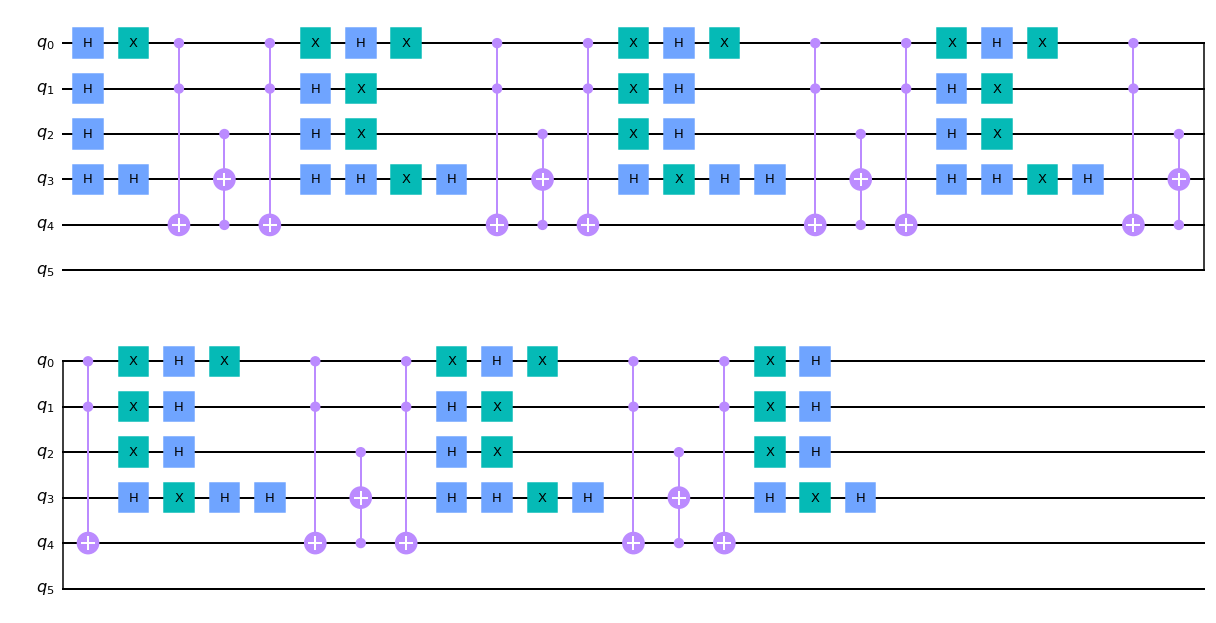

In [26]:
qc8.draw(output='mpl')

In [27]:
result = generate_results(qc8, pass_manager_config)

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
The physical qubits for the toffoli are:  0 1 4
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  2 4 3
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  0 1 4
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  0 1 4
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  2 4 3
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  0 1 4
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  0 1 

look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('00', '00', 'f', 'p')
didn't find match tag
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('00', '00', 'f', 'p')
didn't find match tag
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('00', '00', 'f', 'p')
didn't find match tag
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
The physical qubits for the toffoli are:  0 1 4
The required toffoli will be decomposed using 

intersect [Qubit(QuantumRegister(20, 'q'), 4), Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 4), Qubit(QuantumRegister(20, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 2), Qubit(QuantumRegister(20, 'q'), 4)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 2), Qubit(QuantumRegister(20, 'q'), 3)]
('00', '11', 'b')
('11', '00', 'b')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 1), Qubit(QuantumRegister(20, 'q'), 4)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 0), Qubit(QuantumRegister(20, 'q'), 4)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 4), Qubit(QuantumRegister(20, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q')

In [28]:
for i in result:
    print(i.count_ops())

OrderedDict([('rz', 155), ('cx', 108), ('sx', 42)])
OrderedDict([('rz', 416), ('sx', 290), ('acecr_pm', 108), ('x', 15)])
OrderedDict([('rz', 187), ('sx', 96), ('cx', 91), ('x', 17)])
OrderedDict([('rz', 287), ('sx', 212), ('acecr_pm', 91), ('x', 1)])


In [29]:
result_lists = []
for qc in qc_list:
    result_lists.append(generate_results(qc, pass_manager_config))

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
The physical qubits for the toffoli are:  10 5 6
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  9 4 10
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  8 3 9
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  7 2 8
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  0 1 7
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  7 2 8
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  8 3 9
The 

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
The physical qubits for the toffoli are:  10 5 6
The required toffoli will be decomposed using a 6 cnot decomposition
three intersection conditions False True True
three qargs Qubit(QuantumRegister(20, 'q'), 10) Qubit(QuantumRegister(20, 'q'), 5) Qubit(QuantumRegister(20, 'q'), 6)
calculated tags ['00', '12', 'f', 's'] ['12', '00', 'f', 'p']
initialized variant_tag: ('00', '12', 'f', 's')
The physical qubits for the toffoli are:  9 4 10
The required toffoli will be decomposed using a 6 cnot decomposition
three intersection conditions False True True
three qargs Qubit(QuantumRegister(20, 'q'), 9) Qubit(QuantumRegister(20, 'q'), 4) Qubit(QuantumRegister(20, 'q'), 10)
calculated tags ['00', '12', 'f', 's'] ['12', '00', 'f', 'p']
initialized variant_tag: ('00', '12', 'f', 's')
The physical qubits for the toffoli are:  8 3 9
The required toffoli will be decomposed using a 6 cnot decomposition
three intersection conditions False

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
The physical qubits for the toffoli are:  18 9 10
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  17 8 18
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  16 7 17
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  15 6 16
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  14 5 15
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  13 4 14
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  12 3 13
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
The physical qubits for the toffoli are:  18 9 10
The required toffoli will be decomposed using a 6 cnot decomposition
three intersection conditions False True True
three qargs Qubit(QuantumRegister(20, 'q'), 18) Qubit(QuantumRegister(20, 'q'), 9) Qubit(QuantumRegister(20, 'q'), 10)
calculated tags ['00', '12', 'f', 's'] ['12', '00', 'f', 'p']
initialized variant_tag: ('00', '12', 'f', 's')
The physical qubits for the toffoli are:  17 8 18
The required toffoli will be decomposed using a 6 cnot decomposition
three intersection conditions False True True
three qargs Qubit(QuantumRegister(20, 'q'), 17) Qubit(QuantumRegister(20, 'q'), 8) Qubit(QuantumRegister(20, 'q'), 18)
calculated tags ['00', '12', 'f', 's'] ['12', '00', 'f', 'p']
initialized variant_tag: ('00', '12', 'f', 's')
The physical qubits for the toffoli are:  16 7 17
The required toffoli will be decom

('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 11)]
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 12)]
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 13)]
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 14)]
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 15)]
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 16)]
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 17)]
('11', '00', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 9)]
intersect [Qubit(QuantumRegister(20, 'q'), 18)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 18), Qubit(QuantumRegister(20, 'q'), 10)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 9), Qubit(QuantumRegister(20, 'q'), 10)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
The physical qubits for the toffoli are:  0 1 11
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  2 3 12
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  4 5 13
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  6 7 14
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  8 9 15
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  11 12 16
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  13 14 17
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  16 17 18
The required toffoli will be decomposed using a 6 c

look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('00', '00', 'f', 'p')
didn't find match tag
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('01', '0

intersect [Qubit(QuantumRegister(20, 'q'), 11), Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 11), Qubit(QuantumRegister(20, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 12), Qubit(QuantumRegister(20, 'q'), 2)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 12), Qubit(QuantumRegister(20, 'q'), 3)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 13), Qubit(QuantumRegister(20, 'q'), 4)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 13), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 14), Qubit(QuantumRegister(20, 'q'), 6)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 14), Qubi

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
The physical qubits for the toffoli are:  0 1 3
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  0 1 3
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  1 3 0
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  0 3 1
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  0 3 1
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  1 3 0
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  1 3 0
The required toffoli will be decom

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
The physical qubits for the toffoli are:  0 1 3
The required toffoli will be decomposed using a 6 cnot decomposition
three intersection conditions True True False
three qargs Qubit(QuantumRegister(20, 'q'), 0) Qubit(QuantumRegister(20, 'q'), 1) Qubit(QuantumRegister(20, 'q'), 3)
calculated tags ['00', '01', 'f', 's'] ['01', '00', 'f', 'p']
initialized variant_tag: ('00', '01', 'f', 's')
The physical qubits for the toffoli are:  0 1 3
The required toffoli will be decomposed using a 6 cnot decomposition
sub_tag before optimize ['01', '00', 'f', 'p']
the optimized substituted tag ['01', '00', 'f', 'p']
initialized variant_tag: ('01', '00', 'f', 'p')
The physical qubits for the toffoli are:  1 3 0
The required toffoli will be decomposed using a 6 cnot decomposition
three inters

look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '01', 'f', 'p')
final tag, three match ('21', '10', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '01', 'f', 'p')
final tag, three match ('21', '10', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '01', 'f', 'p')
final tag, three match ('21', '10', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('12', '01', 'f', 's')


look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('00', '00', 'f', 'p')
didn't find match tag
look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '01', 'f', 'p')
final tag, three match ('21', '10', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '01', 'f', 'p')
final tag, three match ('21', '10', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('00', '00', 'f', 'p')
didn't find match tag
look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '01', 'f', 'p')
final tag, three match ('21', '10', 'f', 'p')


layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
The physical qubits for the toffoli are:  0 10 1
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  1 11 2
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  2 12 3
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  3 13 4
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  4 14 5
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  5 15 6
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:

look for variant_rules ('02', '01', 'f', 's')
final tag, three match ('02', '10', 'f', 's')
look for variant_rules ('02', '01', 'f', 's')
final tag, three match ('02', '10', 'f', 's')
look for variant_rules ('02', '01', 'f', 's')
final tag, three match ('02', '10', 'f', 's')
look for variant_rules ('02', '01', 'f', 's')
final tag, three match ('02', '10', 'f', 's')
look for variant_rules ('02', '01', 'f', 's')
final tag, three match ('02', '10', 'f', 's')
look for variant_rules ('02', '01', 'f', 's')
final tag, three match ('02', '10', 'f', 's')
look for variant_rules ('01', '02', 'f', 's')
final tag, three match ('01', '20', 'f', 's')
look for variant_rules ('01', '02', 'f', 's')
final tag, three match ('01', '20', 'f', 's')
look for variant_rules ('01', '02', 'f', 's')
final tag, three match ('01', '20', 'f', 's')
look for variant_rules ('01', '02', 'f', 's')
final tag, three match ('01', '20', 'f', 's')
look for variant_rules ('01', '02', 'f', 's')
final tag, three match ('01', '20'

intersect [Qubit(QuantumRegister(20, 'q'), 1), Qubit(QuantumRegister(20, 'q'), 10)]
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 2), Qubit(QuantumRegister(20, 'q'), 11)]
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 3), Qubit(QuantumRegister(20, 'q'), 12)]
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 4), Qubit(QuantumRegister(20, 'q'), 13)]
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 5), Qubit(QuantumRegister(20, 'q'), 14)]
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11

('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00

look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for v

intersect [Qubit(QuantumRegister(20, 'q'), 1)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 2)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 3)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 4)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 6)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 7)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 8)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 9), Qubit(QuantumRegister(20, 'q'), 19)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 8)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 7)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 6)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 4)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20

The physical qubits for the toffoli are:  3 2 4
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  0 1 3
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  3 2 4
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  0 1 3
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  1 4 0
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  0 4 1
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  0 4 1
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  1 4 0
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  1 4 0
The required tof

('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11

look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '01', 'f', 'p')
final tag, three match ('21', '10', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '01', 'f', 'p')
final tag, three match ('21', '10', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('02', '12', 'f', 's')
final tag, one match ('01', '12', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('12', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look

look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '01', 'f', 'p')
final tag, three match ('21', '10', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '01', 'f', 'p')
final tag, three match ('21', '10', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('00', '00', 'f', 'p')
didn't find match tag
look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '01', 'f', 'p')
final tag, three match ('21', '10', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match (

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
The physical qubits for the toffoli are:  0 1 6
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  2 3 7
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  4 6 8
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  7 8 5
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qub

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
The physical qubits for the toffoli are:  0 1 6
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  2 3 7
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  4 6 8
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  7 8 5
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  2 3 7
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  2 3 7
The required toffoli will be de

('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11

ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
The physical qubits for the toffoli are:  0 1 6
The required toffoli will be decomposed using a 6 cnot decomposition
three intersection conditions True True False
three qargs Qubit(QuantumRegister(20, 'q'), 0) Qubit(QuantumRegister(20, 'q'), 1) Qubit(QuantumRegister(20, 'q'), 6)
calculated tags ['00', '01', 'f', 's'] ['01', '00', 'f', 'p']
initialized variant_tag: ('00', '01', 'f', 's')
The physical qubits for the toffoli are:  2 3 7
The required toffoli will be decomposed using a 6 cnot decomposition
three intersection conditions True True False
three qargs Qubit(QuantumRegister(20, 'q'), 2) Qubit(QuantumRegister(20, 'q'), 3) Qubit(QuantumRegister(20, 'q'

The required toffoli will be decomposed using a 6 cnot decomposition
three intersection conditions True True False
three qargs Qubit(QuantumRegister(20, 'q'), 4) Qubit(QuantumRegister(20, 'q'), 6) Qubit(QuantumRegister(20, 'q'), 8)
calculated tags ['00', '01', 'f', 's'] ['01', '00', 'f', 'p']
initialized variant_tag: ('00', '01', 'f', 's')
The physical qubits for the toffoli are:  7 8 5
The required toffoli will be decomposed using a 6 cnot decomposition
calculated tags ['00', '00', 'f', 'p'] ['00', '00', 'f', 'p']
calculated tags ['00', '00', 'f', 'p'] ['00', '00', 'f', 'p']
initialized variant_tag: ('00', '00', 'f', 'p')
The physical qubits for the toffoli are:  2 3 7
The required toffoli will be decomposed using a 6 cnot decomposition
sub_tag before optimize ['01', '00', 'f', 'p']
three intersection conditions False False True
three qargs Qubit(QuantumRegister(20, 'q'), 2) Qubit(QuantumRegister(20, 'q'), 3) Qubit(QuantumRegister(20, 'q'), 7)
calculated tags for substituted ['01', '0

final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('00', '00', 'f', 'p')
didn't find match tag
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('00', '00', 'f', 'p')
didn't find match tag
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for v

look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('00', '00', 'f', 'p')
didn't find match tag
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('00', '00', 'f', 'p')
didn't find match tag
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('01', '00', 'f', 'p')
final ta

intersect [Qubit(QuantumRegister(20, 'q'), 6), Qubit(QuantumRegister(20, 'q'), 8)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 1), Qubit(QuantumRegister(20, 'q'), 6)]
('00', '11', 'b')
('11', '00', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 6), Qubit(QuantumRegister(20, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 8), Qubit(QuantumRegister(20, 'q'), 6)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 7), Qubit(QuantumRegister(20, 'q'), 8)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 7), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 8), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'f')
('11'

In [32]:
for index in range(0, len(result_lists)):
    print("qc", index)
    for i in result_lists[index]:
        print(i.count_ops())
        print(success_rate(i.count_ops()))

qc 0
OrderedDict([('rz', 120), ('cx', 96), ('sx', 18)])
0.36780282519926505
OrderedDict([('rz', 347), ('sx', 241), ('acecr_pm', 96), ('x', 20)])
0.3310676533617646
OrderedDict([('rz', 117), ('cx', 74), ('sx', 46), ('x', 14)])
0.4486520573036334
OrderedDict([('rz', 215), ('sx', 165), ('acecr_pm', 74), ('x', 8)])
0.42985161071147826
qc 1
OrderedDict([('rz', 236), ('cx', 192), ('sx', 34)])
0.1392559311183314
OrderedDict([('rz', 695), ('sx', 485), ('acecr_pm', 192), ('x', 36)])
0.11296362400615996
OrderedDict([('rz', 233), ('cx', 146), ('sx', 94), ('x', 30)])
0.21073775940230047
OrderedDict([('rz', 431), ('sx', 329), ('acecr_pm', 146), ('x', 16)])
0.1939887546076437
qc 2
OrderedDict([('rz', 150), ('cx', 102), ('sx', 34)])
0.3440695090056807
OrderedDict([('rz', 408), ('sx', 286), ('acecr_pm', 102), ('x', 12)])
0.30809854731050196
OrderedDict([('rz', 166), ('cx', 86), ('sx', 66), ('x', 16)])
0.39387806758459015
OrderedDict([('rz', 267), ('sx', 202), ('acecr_pm', 86)])
0.37782670121363954
qc 

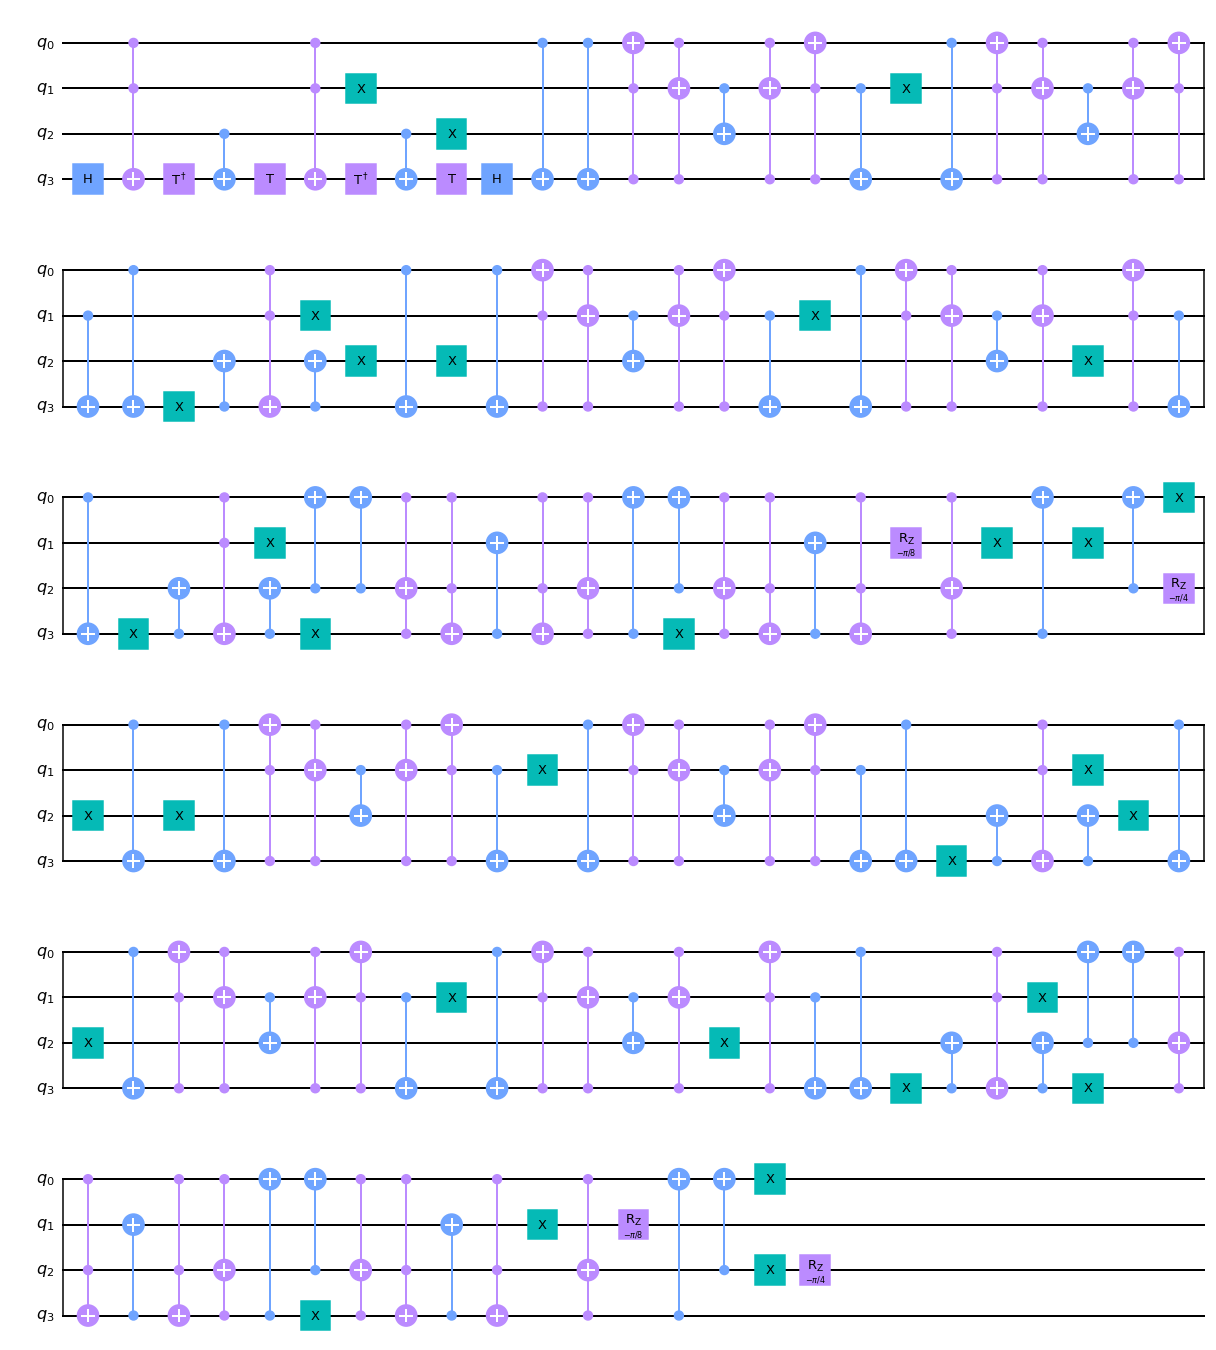

In [28]:
qc3.draw(output='mpl')

In [39]:
pm_orign = level_3_pass_manager(pass_manager_config)
qc_orign6 = pm_orign.run(qc6)

layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
The physical qubits for the toffoli are:  1 4 0
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  0 4 1
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  0 4 1
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  1 4 0
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  1 4 0
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  0 4 1
The required toffoli will be decomposed using a 6 cnot decomposition
The physical qubits for the toffoli are:  0 4 1
The r

In [37]:
pm_context = level_3_context_pass_manager(pass_manager_config)
qc_context6 = pm_context.run(qc6)

layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
The physical qubits for the toffoli are:  1 4 0
The required toffoli will be decomposed using a 6 cnot decomposition
three intersection conditions True True True
three qargs Qubit(QuantumRegister(20, 'q'), 1) Qubit(QuantumRegister(20, 'q'), 4) Qubit(QuantumRegister(20, 'q'), 0)
calculated tags ['00', '01', 'f', 's'] ['21', '00', 'f', 'p']
predecessor cx two intersection conditions:TrueTrue
initialized variant_tag: ('12', '01', 'f', 's')
The physical qubits for the toffoli are:  0 4 1
The required toffoli will be decomposed using a 6 cnot decomposition
sub_tag before optimize ['21', '00', 'f', 'p']
three intersection conditions True True False
three qargs Qubit(QuantumRegister(20, 'q'), 0) Qubit(QuantumRegister(20, 'q'), 4) Qubit(QuantumRegister(

look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '01', 'f', 'p')
final tag, three match ('21', '10', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '01', 'f', 'p')
final tag, three match ('21', '10', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('00', '00', 'f', 'p')
didn't find match tag
look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '01', 'f', 'p')
final tag, three match ('21', '10', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match (

In [38]:

pm_context_pulse = level_3_context_pulse_pass_manager(pass_manager_config)
qc_context_pulse6 = pm_context_pulse.run(qc6)

layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
The physical qubits for the toffoli are:  1 4 0
The required toffoli will be decomposed using a 6 cnot decomposition
three intersection conditions True True True
three qargs Qubit(QuantumRegister(20, 'q'), 1) Qubit(QuantumRegister(20, 'q'), 4) Qubit(QuantumRegister(20, 'q'), 0)
calculated tags ['00', '01', 'f', 's'] ['21', '00', 'f', 'p']
predecessor cx two intersection conditions:TrueTrue
initialized variant_tag: ('12', '01', 'f', 's')
The physical qubits for the toffoli are:  0 4 1
The required toffoli will be decomposed using a 6 cnot decomposition
sub_tag before optimize ['21', '00', 'f', 'p']
three intersection conditions True True False
three qargs Qubit(QuantumRegister(20, 'q'), 0) Qubit(QuantumRegister(20, 'q'), 4) Qubit(QuantumRegister(

look for variant_rules ('12', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('01', '00', 'f', 'p')
final tag, one match ('10', '02', 'f', 'p')
look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '01', 'f', 'p')
final tag, three match ('21', '10', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '01', 'f', 'p')
final tag, three match ('21', '10', 'f', 'p')
look for variant_rules ('00', '01', 'f', 's')
final tag, one match ('20', '01', 'f', 'p')
look for variant_rules ('21', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('00', '00', 'f', 'p')
didn't find match tag
look for variant_rules ('12', '01', 'f', 's')
look for variant_rules ('21', '01', 'f', 'p')
final tag, three match (

In [96]:
qc8 = generate_random_QAOA(20, 0.6, 2)

In [97]:
result_lists = generate_results(qc8, pass_manager_config)

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
No solution found:  nonexistent solution
Layout({
19: Qubit(QuantumRegister(20, 'q'), 0),
18: Qubit(QuantumRegister(20, 'q'), 1),
17: Qubit(QuantumRegister(20, 'q'), 2),
16: Qubit(QuantumRegister(20, 'q'), 3),
14: Qubit(QuantumRegister(20, 'q'), 4),
13: Qubit(QuantumRegister(20, 'q'), 5),
12: Qubit(QuantumRegister(20, 'q'), 6),
11: Qubit(QuantumRegister(20, 'q'), 7),
4: Qubit(QuantumRegister(20, 'q'), 8),
3: Qubit(QuantumRegister(20, 'q'), 9),
2: Qubit(QuantumRegister(20, 'q'), 10),
1: Qubit(QuantumRegister(20, 'q'), 11),
15: Qubit(QuantumRegister(20, 'q'), 12),
10: Qubit(QuantumRegister(20, 'q'), 13),
0: Qubit(QuantumRegister(20, 'q'), 14),
5: Qubit(QuantumRegister(20, 'q'), 15),
9: Qubit(QuantumRegister(20, 'q'), 16),
8: Qubit(QuantumRegister(20, 'q'), 17),
6: Qubit(QuantumRegister(20, 'q'), 18),
7: Qubit(Q

('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
('11', '00

No solution found:  nonexistent solution
Layout({
19: Qubit(QuantumRegister(20, 'q'), 0),
18: Qubit(QuantumRegister(20, 'q'), 1),
17: Qubit(QuantumRegister(20, 'q'), 2),
16: Qubit(QuantumRegister(20, 'q'), 3),
14: Qubit(QuantumRegister(20, 'q'), 4),
13: Qubit(QuantumRegister(20, 'q'), 5),
12: Qubit(QuantumRegister(20, 'q'), 6),
11: Qubit(QuantumRegister(20, 'q'), 7),
4: Qubit(QuantumRegister(20, 'q'), 8),
3: Qubit(QuantumRegister(20, 'q'), 9),
2: Qubit(QuantumRegister(20, 'q'), 10),
1: Qubit(QuantumRegister(20, 'q'), 11),
15: Qubit(QuantumRegister(20, 'q'), 12),
10: Qubit(QuantumRegister(20, 'q'), 13),
0: Qubit(QuantumRegister(20, 'q'), 14),
5: Qubit(QuantumRegister(20, 'q'), 15),
9: Qubit(QuantumRegister(20, 'q'), 16),
8: Qubit(QuantumRegister(20, 'q'), 17),
6: Qubit(QuantumRegister(20, 'q'), 18),
7: Qubit(QuantumRegister(20, 'q'), 19)
})
No solution found:  nonexistent solution
Layout({
19: Qubit(QuantumRegister(20, 'q'), 0),
18: Qubit(QuantumRegister(20, 'q'), 1),
17: Qubit(QuantumR

('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 10), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 5), Qubit(QuantumRegister(20, 'q'), 10)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 10), Qubit(QuantumRegister(20, 'q'), 11)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 12), Qubit(QuantumRegister(20, 'q'), 10)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 12), Qubit(QuantumRegister(20, 'q'), 10)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 10), Qubit(QuantumRegister(20, 'q'), 14)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 11), Qubit(QuantumRegister(20, 'q'), 10)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 11), Qubit(QuantumRegister(20, 'q'), 10)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit

('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 15), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 5), Qubit(QuantumRegister(20, 'q'), 15)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 15), Qubit(QuantumRegister(20, 'q'), 19)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 15), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'f')
('11', '00', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 15), Qubit(QuantumRegister(20, 'q'), 17)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 18), Qubit(QuantumRegister(20, 'q'), 15)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 18), Qubit(QuantumRegister(20, 'q'), 15)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 17), Qubit(QuantumRegister(20, 'q'), 15)]
('00', '11', 'f')
('11', '00', 'b')

intersect [Qubit(QuantumRegister(20, 'q'), 5), Qubit(QuantumRegister(20, 'q'), 9)]
('00', '11', 'b')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 15), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 15), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 5), Qubit(QuantumRegister(20, 'q'), 15)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 15), Qubit(QuantumRegister(20, 'q'), 17)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 15), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'f')
('11', '00', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 15), Qubit(QuantumRegister(20, 'q'), 5)]
('00', '11', 'f')
('11', '00', 'f')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 5), Qubit(QuantumRegister(20, 'q'), 15)]
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(Quant

In [98]:
for i in result_lists:
    print(i.count_ops())
    print(success_rate(i.count_ops()))

OrderedDict([('cx', 841), ('rz', 190), ('x', 43), ('sx', 12)])
0.00019949492040881208
OrderedDict([('rz', 2028), ('sx', 1045), ('acecr_pm', 841), ('x', 575)])
8.620565523591051e-05
OrderedDict([('cx', 841), ('rz', 190), ('x', 43), ('sx', 12)])
0.00019949492040881208
OrderedDict([('rz', 2026), ('sx', 1021), ('acecr_pm', 841), ('x', 339)])
0.00010513163822502623


In [37]:
qc3 = generate_cnx_log_depth(19)
qc3.count_ops()

OrderedDict([('ccx', 17)])

In [54]:
result_lists0 = generate_results(qc0, pass_manager_config)

layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
layout_method:  dense
routing method:  basic
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
Layout({
18: Qubit(QuantumRegister(18, 'q'), 7),
15: Qubit(QuantumRegister(18, 'q'), 8),
0: Qubit(QuantumRegister(18, 'q'), 9),
2: Qubit(QuantumRegister(18, 'q'), 10),
10: Qubit(QuantumRegister(18, 'q'), 3),
16: Qubit(QuantumRegister(18, 'q'), 0),
17: Qubit(QuantumRegister(18, 'q'), 1),
19: Qubit(QuantumRegister(18, 'q'), 2),
3: Qubit(QuantumRegister(18, 'q'), 4),
4: Qubit(QuantumRegister(18, 'q'), 5),
1: Qubit(QuantumRegister(18, 'q'), 6),
9: Qubit(QuantumRegister(18, 'q'), 11),
7: Qubit(QuantumRegister(18, 'q'), 12),
6: Qubit(QuantumRegister(18, 'q'), 13),
8: Qubit(QuantumRegister(18, 'q'), 14),
14: Qubit(QuantumRegister(18, 'q'), 15),
11: Qubit(QuantumRegister(18, 'q'), 16),
13: Qubit(QuantumRegister(18, 'q'), 17)
})
The physical qubits for th

look for variant_rules ('12', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
look for variant_rules ('12', '00', 'f', 'p')
final tag, one match ('12', '01', 'f', 's')
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
ccx
Layout({
18: Qubit(QuantumRegister(18, 'q'), 7),
15: Qubit(QuantumRegister(18, 'q'), 8),
0: Qubit(QuantumRegister(18, 'q'), 9),
2: Qubit(QuantumRegister(18, 'q'), 10),
10: Qubit(QuantumRegister(18, 'q'), 3),
16: Qubit(QuantumRegister(18, 'q'), 0),
17: Qubit(QuantumRegister(18, 'q'), 1),
19: Qubit(QuantumRegister(18, 'q'), 2),
3: Qubit(QuantumRegister(18, 'q'), 4),
4: Qubit(QuantumRegister(18, 'q'), 5),
1: Qubit(QuantumRegister(18, 'q'), 6),
9: Qubit(QuantumRegister(18, 'q'), 11),
7: Qubit(QuantumRegister(18, 'q'), 12),
6: Qubit(QuantumRegister(18, 'q'), 13),
8: Qubit(QuantumRegister(18, 'q'), 14),
14: Qubit(QuantumRegister(18, 'q'), 15),
11: Qubit(QuantumRegister(18, 'q'), 16),
13: Qubit(QuantumRegister(18, 'q'), 17)
})
The physical qubits for th

('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 4)]
intersect [Qubit(QuantumRegister(20, 'q'), 2)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 2), Qubit(QuantumRegister(20, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 4), Qubit(QuantumRegister(20, 'q'), 1)]
('00', '11', 'f')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 0), Qubit(QuantumRegister(20, 'q'), 2)]
('00', '11', 'b')
('11', '00', 'b')
('11', '00', 'f')
('00', '11', 'b')
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 15)]
('11', '00', 'f')
intersect [Qubit(QuantumRegister(20, 'q'), 15), Qubit(QuantumRegister(20, 'q'), 0)]
('00', '11', 'f')
('11', '00', 'f')
('11', '00', 'f')
('00', '11', 'b')
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 18)]
('00', '11', 'b')
intersect [Qubit(QuantumRegister(20, 'q'), 18), Qubit(QuantumRegister(

In [31]:
def success_rate(op_dict, display = False, total_time = 100, t1 = 70000, t2 = 72000, cx_error = 0.01, cr_error = 0.01, sx_error = 0.0004, x_error = 0.0008, ccx_error = 0.02):
    try:
        sx_count = op_dict['sx']
    except:
        sx_count = 0
    try:
        x_count = op_dict['x']
    except:
        x_count = 0
    try:
        cx_count = op_dict['cx']
    except:
        cx_count = 0
    try:
        cr_count = op_dict['acecr_pm']
    except:
        cr_count = 0
    try:
        ccx_count = op_dict['ccx']
    except:
        ccx_count = 0
    pst = np.exp(- 10 * total_time / t1 - 10 * total_time / t2) * (1 - sx_error) ** sx_count \
    * (1 - x_error) ** x_count * (1 - cx_error) ** cx_count * (1 - ccx_error) ** ccx_count * (1 - cr_error) ** cr_count
    if display == True:
        print("Total Time:{}, T1:{}, T2:{}, success_rate:{}".format(total_time, t1, t2, np.exp(-10 * total_time / t1 - 10 * total_time / t2)))
        print("sx_count:{}, sx_error:{}, sx_success_rate:{}".format(sx_count, sx_error, (1 - sx_error) ** sx_count))
        print("x_count:{}, x_error:{}, x_success_rate:{}".format(x_count, x_error, (1 - x_error) ** x_count))
        print("cx_count:{}, cx_error:{}, cx_success_rate:{}".format(cx_count, cx_error, (1 - cx_error) ** cx_count))
        print("cr_count:{}, cr_error:{}, cr_success_rate:{}".format(cr_count, cr_error, (1 - cr_error) ** cr_count))
        print("ccx_count:{}, ccx_error:{}, ccx_success_rate:{}".format(ccx_count, ccx_error, (1 - ccx_error) ** ccx_count))
    return pst

In [63]:
for i in result_lists0:
    print(i.count_ops())
    pst = success_rate(i.count_ops())
    print(pst)

OrderedDict([('rz', 120), ('cx', 96), ('sx', 18)])
Total Time:100, T1:70000, T2:72000, success_rate:0.97221859952684
sx_count:18, sx_error:0.0004, sx_success_rate:0.9928244278542492
x_count:0, x_error:0.0004, x_success_rate:1.0
cx_count:96, cx_error:0.0147, cx_success_rate:0.24130946001294448
cr_count:0, cr_error:0.0147, cr_success_rate:1.0
ccx_count:0, ccx_error:0.02, ccx_success_rate:1.0
0.23292211625051087
OrderedDict([('rz', 289), ('sx', 189), ('acecr_pm', 96), ('x', 45)])
Total Time:100, T1:70000, T2:72000, success_rate:0.97221859952684
sx_count:189, sx_error:0.0004, sx_success_rate:0.9271729844961487
x_count:45, x_error:0.0004, x_success_rate:0.9821574956417964
cx_count:0, cx_error:0.0147, cx_success_rate:1.0
cr_count:96, cr_error:0.0147, cr_success_rate:0.24130946001294448
ccx_count:0, ccx_error:0.02, ccx_success_rate:1.0
0.21363882339941706
OrderedDict([('rz', 114), ('cx', 74), ('sx', 46), ('x', 4)])
Total Time:100, T1:70000, T2:72000, success_rate:0.97221859952684
sx_count:46,

In [ ]:
pst = success_rate(op_dict)

In [40]:
from qiskit_superstaq.superstaq_provider import SuperstaQProvider
import cirq

In [41]:
superstaq_provider = SuperstaQProvider(api_key="ya29.A0ARrdaM-BWPjpkjhKgbVSRwWROaVE3g6mKCew2all4yXuPNLIwc6l65K10DiAMa-w8he0mR-i0Tb_jE6-GqqWlscj9Zq58rC2oSSzRVaLdZJMoy2bWqIXVhK3Tehp5N4zd8uHhyp01G9KC90Xmu3BKALiGiLP-w")

In [42]:
orign_pulse_out = superstaq_provider.cq_compile(qc_orign_pulse, target="ibmq_montreal_qpu")

NameError: name 'qc_orign_pulse' is not defined

In [ ]:
context_pulse_out = superstaq_provider.cq_compile(qc_context_pulse, target="ibmq_montreal_qpu")